# Limiarização por Média Móvel

## Introdução

## Implementação

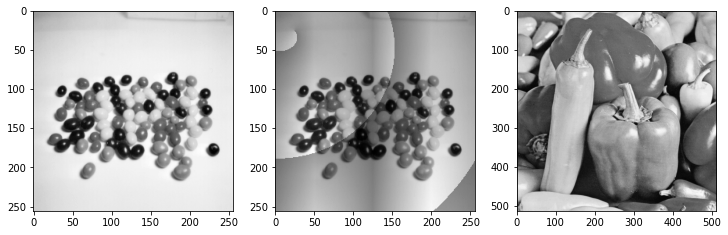

In [7]:
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt
import math
from IPython.display import Image

imgA0 = cv.imread("../gcPDI2/imgPDI2/beansp.tiff",0)
imgA1 = cv.imread("../gcPDI2/imgPDI2/beansmask.tiff",0)
imgB = cv.imread("../gcPDI2/imgPDI2/vegetables.tiff",0)

f, axarr = plt.subplots(1, 3, constrained_layout=True)
f.set_figheight(10)
f.set_figwidth(10)
axarr[0].imshow(imgA0,'gray')
axarr[1].imshow(imgA1, 'gray')
axarr[2].imshow(imgB, 'gray')
plt.show()

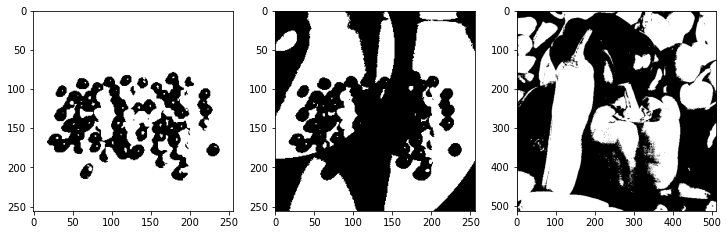

In [9]:
f, axarr = plt.subplots(1, 3, constrained_layout=True)
f.set_figheight(10)
f.set_figwidth(10)
ret,threshA0 = cv.threshold(imgA0,127,255,cv.THRESH_BINARY)
axarr[0].imshow(threshA0,'gray')
ret,threshA1 = cv.threshold(imgA1,127,255,cv.THRESH_BINARY)
axarr[1].imshow(threshA1, 'gray')
ret,threshB = cv.threshold(imgB,127,255,cv.THRESH_BINARY)
axarr[2].imshow(threshB, 'gray')
plt.show()

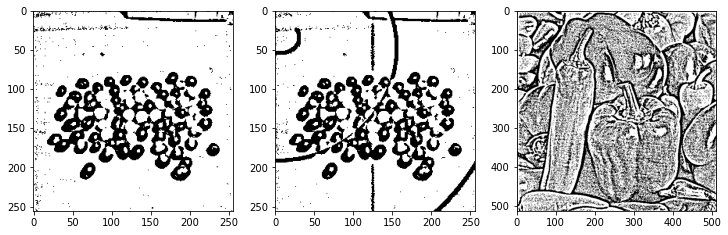

In [17]:
f, axarr = plt.subplots(1, 3, constrained_layout=True)
f.set_figheight(10)
f.set_figwidth(10)
adtA0 = cv.adaptiveThreshold(imgA0,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
axarr[0].imshow(adtA0,'gray')
adtA1 = cv.adaptiveThreshold(imgA1,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
axarr[1].imshow(adtA1, 'gray')
adtB = cv.adaptiveThreshold(imgB,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
axarr[2].imshow(adtB, 'gray')
plt.show()

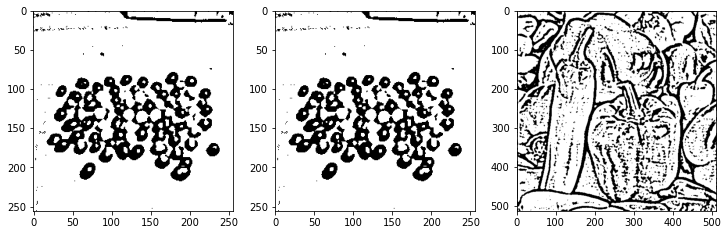

In [19]:
f, axarr = plt.subplots(1, 3, constrained_layout=True)
f.set_figheight(10)
f.set_figwidth(10)
gaussA0 = cv.GaussianBlur(imgA0,(3,3),0)
adtA0 = cv.adaptiveThreshold(gaussA0,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
axarr[0].imshow(adtA0,'gray')
gaussA = cv.GaussianBlur(imgA0,(3,3),0)
adtA1 = cv.adaptiveThreshold(gaussA1,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
axarr[1].imshow(adtA1, 'gray')
gaussB = cv.GaussianBlur(imgB,(7,7),0)
adtB = cv.adaptiveThreshold(gaussB,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
axarr[2].imshow(adtB, 'gray')
plt.show()

## Implementação

Utilizado um *kernel* unitário que captura os valores de intensidade da imagem ao multiplicar cada elemento por 1 e adicionar a uma variável *tempsum*.

O *kernel* serve para delimitar uma região de *pixels*, qual a dimensão da vizinhança que afetará o cálculo da média.

O *constC* serve para criar uma "folga" no valor a ser usado como limiar, evitando amplas regiões com muita variação entre branco e preto.

In [50]:
#MovingAverageThreshold
def movAT(img, kernel,constC):
    Arow, Acol = img.shape
    Brow, Bcol = kernel.shape
    
    ROWpad = math.floor((Brow/2))
    COLpad = math.floor((Bcol/2))

    Crow = Arow + ROWpad*2 
    Ccol = Acol + COLpad*2
    C = np.zeros((Crow,Ccol))    
    C[(ROWpad):(Crow-ROWpad), (COLpad):(Ccol-COLpad)] = img.copy()

    D = np.zeros(img.shape)
    for Ci in range(0, Arow): 
        for Cj in range(0, Acol):
            tempsum = 0
            for Ki in range(0, Brow):
                for Kj in range(0, Bcol):
                    tempsum = kernel[Ki,Kj]*C[Ci+Ki,Cj+Kj]+tempsum
            if C[Ci+ROWpad,Cj+COLpad] > tempsum/(Brow*Bcol)-constC:
                D[Ci,Cj]=255
            else:
                D[Ci,Cj]=0
    return D

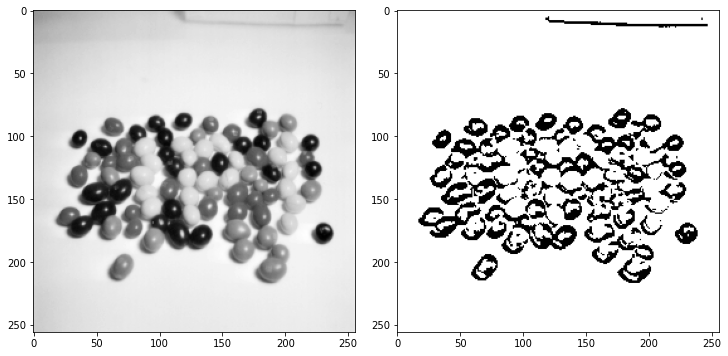

In [51]:
f, axarr = plt.subplots(1, 2, constrained_layout=True)
f.set_figheight(10)
f.set_figwidth(10)
axarr[0].imshow(imgA0,'gray')
kernel = np.ones((9,3))
axarr[1].imshow(movAT(imgA0,kernel,5), 'gray')
plt.show()

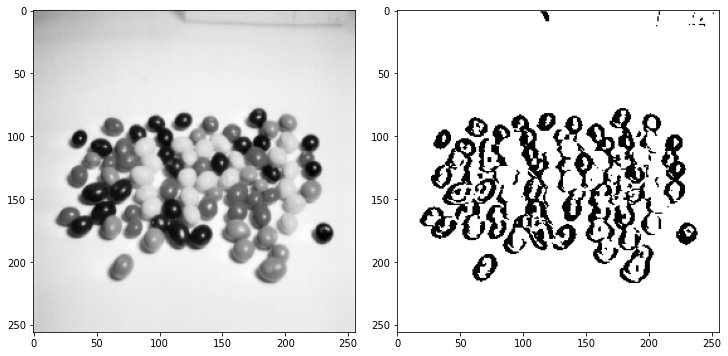

In [52]:
f, axarr = plt.subplots(1, 2, constrained_layout=True)
f.set_figheight(10)
f.set_figwidth(10)
axarr[0].imshow(imgA0,'gray')
kernel = np.ones((3,9))
axarr[1].imshow(movAT(imgA0,kernel,5), 'gray')
plt.show()

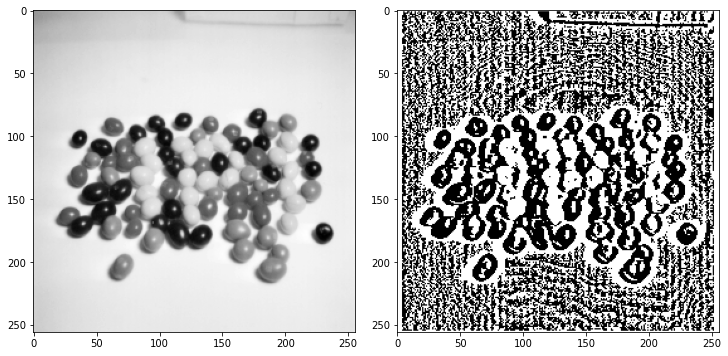

In [58]:
f, axarr = plt.subplots(1, 2, constrained_layout=True)
f.set_figheight(10)
f.set_figwidth(10)
axarr[0].imshow(imgA0,'gray')
kernel = np.ones((3,9))
axarr[1].imshow(movAT(imgA0,kernel,0), 'gray')
plt.show()

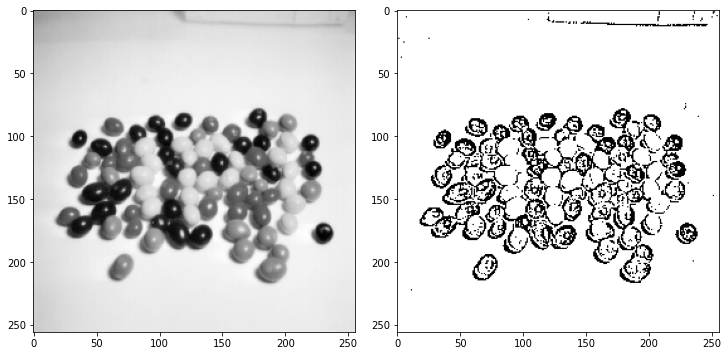

In [53]:
f, axarr = plt.subplots(1, 2, constrained_layout=True)
f.set_figheight(10)
f.set_figwidth(10)
axarr[0].imshow(imgA0,'gray')
kernel = np.ones((3,3))
axarr[1].imshow(movAT(imgA0,kernel,2), 'gray')
plt.show()

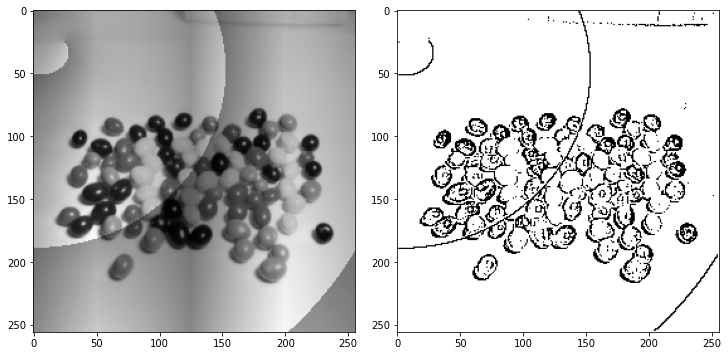

In [55]:
f, axarr = plt.subplots(1, 2, constrained_layout=True)
f.set_figheight(10)
f.set_figwidth(10)
axarr[0].imshow(imgA1,'gray')
kernel = np.ones((3,3))
axarr[1].imshow(movAT(imgA1,kernel,2), 'gray')
plt.show()

## Conclusão

Percebe-se

## Fontes

https://coronavirus.butantan.gov.br/veja-o-coronavirus

SONKA, Milan; HLAVAC, Vaclav; BOYLE, Roger. **Image Processing, Analysis, and Machine Vision.** 4. ed. Stamford: Cengage Learning, 2015.

GONZALEZ, Rafael.; WOODS, Richard. **Digital Image Processing**. 3. ed. Upper Saddle River: Pearson, 2008.
